In [1]:
import pandas as pd

df = pd.read_csv("https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/sdmx/csv/PRC_HICP_MANR?i")


In [2]:
df = df[df["geo"] == "FR"]

In [3]:
df.drop(df.columns[:4], axis=1, inplace=True)



In [4]:
# Supprimer la deuxième colonne geo car on a que des données française
df.drop('geo', axis=1, inplace=True)

# Supprimer la dernière colonne flag parce que pas utile, en utilisant l'index -1
df.drop(df.columns[-1], axis=1, inplace=True)


In [5]:
import matplotlib.pyplot as plt


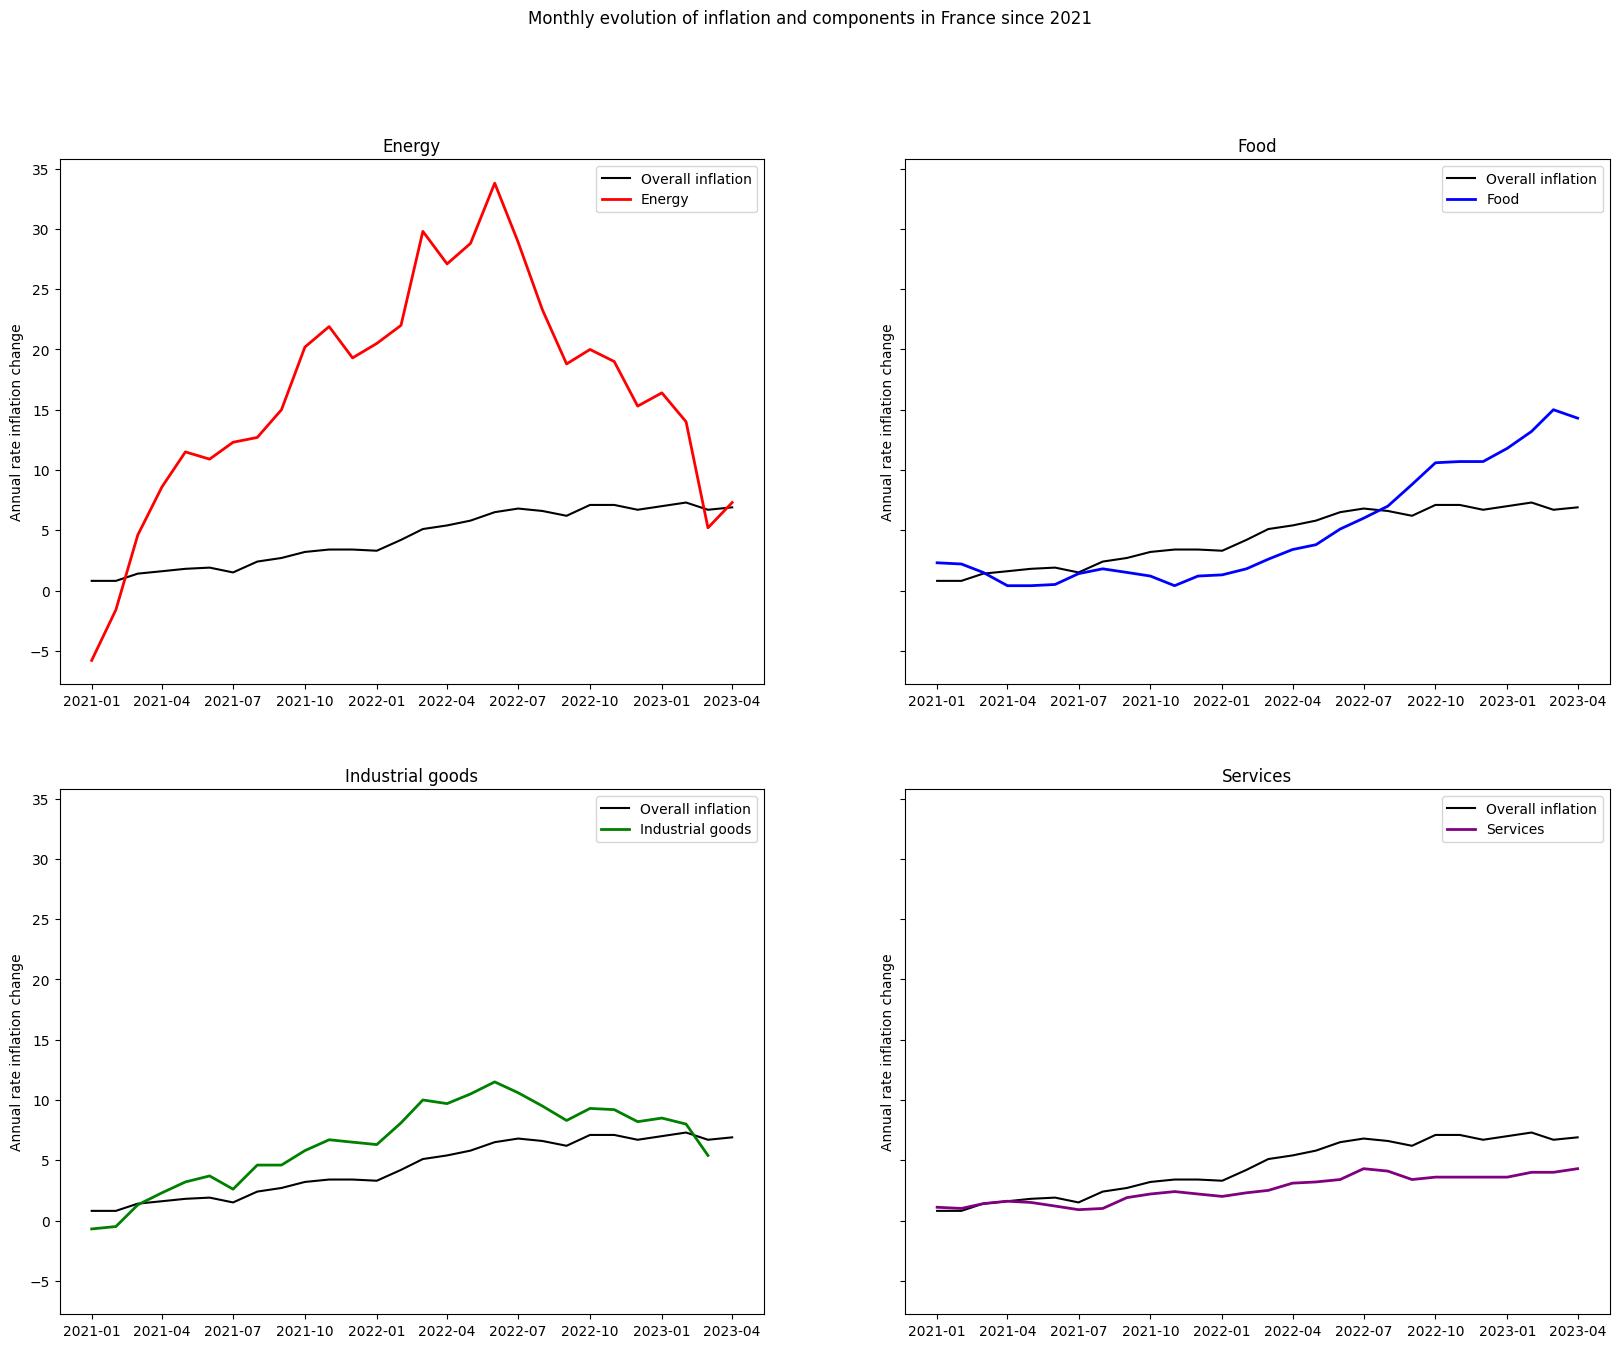

In [6]:

# Convert the "TIME_PERIOD" column to a datetime object
df["TIME_PERIOD"] = pd.to_datetime(df["TIME_PERIOD"])

# Define the components of inflation, corresponding full names, and colors
components = {"NRG": "Energy", "FOOD": "Food", "IGD": "Industrial goods", "SERV": "Services"}
colors = {"Energy": "red", "Food": "blue", "Industrial goods": "green", "Services": "purple"}

# Filter the DataFrame to values after February 2021
df = df.loc[df["TIME_PERIOD"] >= "2021-01"]

# Define the overall inflation df
df_overall = df[df["coicop"] == "CP00"]

# Create a figure with 4 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey=True)

# Iterate over the subplots and plot the lines for each component of inflation
for ax, component in zip(axs.flat, components):
    # Filter the rows where the value in the "coicop" column is equal to the component
    df_component = df[df["coicop"] == component]
    
    # Plot a line for the overall inflation and a line for the component
    ax.plot(df_overall["TIME_PERIOD"], df_overall["OBS_VALUE"], color="black", label="Overall inflation")
    ax.plot(df_component[df_component["coicop"] != "CP00"]["TIME_PERIOD"], df_component[df_component["coicop"] != "CP00"]["OBS_VALUE"], color=colors[components[component]], linewidth=2, label=components[component])
    
    # Add a title for the subplot
    ax.set_title(components[component])
    
    # Add a label for the y-axis
    ax.set_ylabel("Annual rate inflation change")

    # Add a legend for the subplot
    ax.legend()

# Add a title for the entire figure
fig.suptitle("Monthly evolution of inflation and components in France since 2021")

# Show the figure
plt.show()
